In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import itertools
from sklearn.preprocessing import OneHotEncoder
sns.set_style("whitegrid")
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

# Part 1

In [47]:
cars = pd.read_csv("car_data.csv")

In [48]:
mvp = cars[['Mileage', 'Price']]

In [49]:
mvp.head()

Mileage         Price
0     8221  17314.103129
1     9135  17542.036083
2    13196  16218.847862
3    16342  16336.913140
4    19832  16339.170324

In [50]:
regr = linear_model.LinearRegression()
reshape_milage = mvp["Mileage"].values.reshape((-1,1))
regr.fit(reshape_milage, mvp["Price"].values)

/Users/MatthewBarnette/iron_yard_hw/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
def plot_regression(fn):
    plt.scatter(cars["Mileage"], cars["Price"])
    xmin, xmax = plt.xlim()
    xs = np.linspace(xmin, xmax, 100)
    plt.ylim(ymax=80000, ymin=0)
    plt.plot(xs, [fn(x) for x in xs])

y = [-0.1725205]x + 24764.55900606168


/Users/MatthewBarnette/iron_yard_hw/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


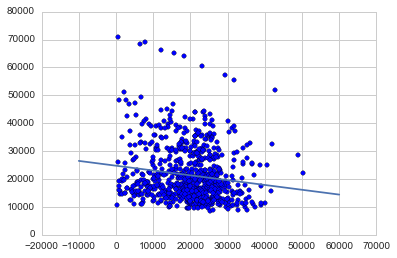

In [52]:
fn = lambda x: regr.predict(x)[0]
plot_regression(fn)
print("y = {}x + {}".format(regr.coef_, regr.intercept_))

In [53]:
regr.score(reshape_milage, mvp["Price"])

0.020463447323489481

The combination of mileage and price make for a rather bad mark for the price of a car. This would be due in large part because of all the other factors that are ignored by this subset of information.

# Part 2

In [54]:
cars.head()

Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
4      4       1      0        1

In [55]:
cars2 = cars[['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
input_data = cars2[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
price = cars2["Price"]

In [56]:
regress = linear_model.LinearRegression()
fit = regress.fit(input_data, price)

In [57]:
print(regress.score(input_data, price))
print("Coefecient: ", regress.coef_)
print("Y-intercept: ", regress.intercept_)

0.446264353673
Coefecient:  [ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03]
Y-intercept:  6758.7551436


When you add several of these factors you still do not have a good R^2 score for figuring out the price of the car. At only .44 there has to be more to pricing cars than simply the designs.

In [58]:
dependent_vars = list(cars2.columns)
dependent_vars.remove("Price")
combos = list(itertools.combinations(dependent_vars, 2))

choices = []

def regression_for(combos):
    combo = list(combos)
    df = cars2.loc[:, combo + ['Price']]
    df.dropna(inplace = True)
    input_data = df[combo]
    price = cars2['Price']
    regres = linear_model.LinearRegression()
    regres.fit(input_data, price)
    return regres, regres.score(input_data, price)

for combo in combos:
    rgr, score = regression_for(combo)
    choices.append((combo, score))

best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)

(('Cylinder', 'Cruise'), 0.38394913240273443)
[ 3392.58658184  6000.36575223] -1046.43091026


Surprisingly the best combination out of these selections are the cylinder and cruise. One would assume that, while the cylinder would be a factor, something like the amount of doors might make more of a differance as it could signify whether it was a larger or smaller car.

# Hard Mode

In [ ]:
#http://stackoverflow.com/questions/11587782/creating-dummy-variables-in-pandas-for-python

In [59]:
for elem in cars["Make"].unique():
    cars[str(elem)] = cars["Make"] == elem
    
for elem in cars["Model"].unique():
    cars[str(elem)] = cars["Model"] == elem
    
for elem in cars["Type"].unique():
    cars[str(elem)] = cars["Type"] == elem

In [62]:
cars.head()

Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  ...      9_5  9_5 HO 9-2X AWD    Ion L Series Sedan  \
0      4       1  ...    False   False    False  False    False  True   
1      4       1  ...    False   False    False  False    False  True   
2      4       1  ...    False   False    False  False    False  True   
3      4       1  ...    False   False    False  False    False  True   
4      4       1  ...    False   False    False  False    False  True   

  Convertible Hatchback  Coupe  Wagon  
0       False     False  False  False  
1       False     False  False  False  
2       False     False  False  False  
3       False     False  False  False  
4       False     False  False  False  

[5 rows x 55 columns]

In [63]:
cars.columns.values

array(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Buick', 'Cadillac',
       'Chevrolet', 'Pontiac', 'SAAB', 'Saturn', 'Century', 'Lacrosse',
       'Lesabre', 'Park Avenue', 'CST-V', 'CTS', 'Deville', 'STS-V6',
       'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier', 'Classic', 'Cobalt',
       'Corvette', 'Impala', 'Malibu', 'Monte Carlo', 'Bonneville', 'G6',
       'Grand Am', 'Grand Prix', 'GTO', 'Sunfire', 'Vibe', '9_3', '9_3 HO',
       '9_5', '9_5 HO', '9-2X AWD', 'Ion', 'L Series', 'Sedan',
       'Convertible', 'Hatchback', 'Coupe', 'Wagon'], dtype=object)

In [66]:
cars3 = cars[['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Buick', 'Cadillac', 
              'Chevrolet', 'Pontiac', 'SAAB', 'Saturn', 'Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V',
              'CTS', 'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier', 'Classic', 'Cobalt', 'Corvette', 
              'Impala', 'Malibu', 'Monte Carlo', 'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire', 
              'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion', 'L Series', 'Sedan', 'Convertible', 
              'Hatchback', 'Coupe', 'Wagon']]

In [67]:
input_data = cars3[['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Buick', 'Cadillac', 
              'Chevrolet', 'Pontiac', 'SAAB', 'Saturn', 'Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V',
              'CTS', 'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier', 'Classic', 'Cobalt', 'Corvette', 
              'Impala', 'Malibu', 'Monte Carlo', 'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire', 
              'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion', 'L Series', 'Sedan', 'Convertible', 
              'Hatchback', 'Coupe', 'Wagon']]
price = cars3["Price"]

In [68]:
regress = linear_model.LinearRegression()
fit = regress.fit(input_data, price)

In [69]:
print(regress.score(input_data, price))
print("Coefecient: ", regress.coef_)
print("Y-intercept: ", regress.intercept_)

1.0
Coefecient:  [  1.00000000e+00   2.22044605e-16  -6.56811075e-13   4.44252033e-12
  -1.02939592e-13   1.92053218e-12   1.02623206e-12   2.11468490e-13
  -2.85274832e-12   3.49496295e-12  -2.46048604e-12  -7.73425933e-13
   1.82036670e-12   7.71330604e-13  -7.92461437e-12   3.12590778e-12
   1.82858620e-12   1.17372084e-13  -7.59056865e-13   5.79331499e-12
  -5.15995271e-12   8.13570821e-13  -2.11915337e-12   4.92624001e-12
  -3.49210836e-13   4.76772493e-14   2.41694428e-12   9.56360829e-13
   5.10766556e-13  -2.17642377e-12  -1.15553885e-12  -2.71106152e-12
  -9.65123911e-13  -6.30019059e-14   1.77045679e-12  -1.05154527e-12
  -3.86979755e-12   1.26926491e-12   2.13632096e-12   1.26599699e-12
   1.17891229e-12   4.70392065e-14   3.83460993e-13  -1.05504277e-12
   4.01090348e-13   3.70240264e-13  -6.66410947e-14  -2.13820454e-13
  -1.77129450e-13   2.65290238e-13   1.92300737e-13]
Y-intercept:  7.27595761418e-12


In [71]:
dependent_vars = list(cars3.columns)
dependent_vars.remove("Price")
combos = list(itertools.combinations(dependent_vars, 2))

choices = []

def regression_for(combos):
    combo = list(combos)
    df = cars3.loc[:, combo + ['Price']]
    df.dropna(inplace = True)
    input_data = df[combo]
    price = cars3['Price']
    regres = linear_model.LinearRegression()
    regres.fit(input_data, price)
    return regres, regres.score(input_data, price)

for combo in combos:
    rgr, score = regression_for(combo)
    choices.append((combo, score))

best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)

(('Cylinder', 'SAAB'), 0.67113089332616738)
[  5736.0313085   17977.69117969] -11427.1117268


And here we come to the best R^2 score we've had. With the best combination being the Cylinder and the make of one of the cars. This would make sense as many manufacturers would set their prices differently regardless of the cars similarities. So the best combination is probably not simply cylinder and SAAB, but cylinder and make.